In [1]:
from math import sqrt
import numpy as np
from numpy import linalg # pentru norma
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits import mplot3d
import math
plt.rcParams.update({'figure.max_open_warning': 0}) # pt prea multe plotari

# EX 1
Sa se verifice daca forma biliniara (1) admite un punct de minim unic si ın caz afirmativ sa se determine acesta
folosind
1. Metoda pasului descendent;
2. Metoda gradientilor conjugati.

Sa se reprezinte pe graficul curbelor de nivel aproximarea obtinuta la fiecare iteratie pentru cele doua metode.

In [2]:
def poz_def(matrix):
    n = matrix.shape[0]
    for i in range(n):
        minor = matrix[:i+1, :i+1] # extrag fiecare minor din matrice
        if np.linalg.det(minor) < 0: # daca det(minor) e negativ atunci matricea nu e poz def
            return False
    return True

In [3]:
def pas_descedent(A, b, x):
    x_steps = [x]
    
    if (poz_def(A) == False | (A != A.T).any()):
        print('Matricea A trb sa fie simetrica si poz def')
    
    k = 0
    r = b - A @ x
    while np.linalg.norm(r) > 1e-14:
        alpha = (r.T @ r) / (r.T @ A @ r)
        x = x + alpha * r
        r = b - A @ x
        k += 1
        
        if k > 1000:
            break
            
        x_steps.append(x) # adaug aproximarea de la pasul curent
        
    return x, x_steps # solutia x, aproximarile obtinute la fiecare iteratie

In [4]:
def grid_discret(A, b):
    """
    Construieste un grid discret si evaleaza f in fiecare punct al gridului
    """
    
    size = 50 # Numar de puncte pe fiecare axa
    x1 = np.linspace(-4, 6, size) # Axa x1
    x2 = np.linspace(-6, 4, size) # Axa x2
    X1, X2 = np.meshgrid(x1, x2) # Creeaza un grid pe planul determinat de axele x1 si x2

    X3 = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.array([X1[i,j], X2[i,j]]) # x e vectorul ce contine coordonatele unui punct din gridul definit mai sus
            X3[i,j] = .5 * x @ A @ x - x @ b # Evaluam functia in punctul x
            
    return X1, X2, X3

def grafic_f(A,b):
    """
    Construieste graficul functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)

    # Defineste o figura 3D
    fig1 = plt.figure()
    ax = plt.axes(projection="3d")

    # Construieste graficul functiei f folosind gridul discret X1, X2, X3=f(X1,X2)
    ax.plot_surface(X1, X2, X3, rstride=1, cstride=1, cmap='winter', edgecolor='none')

    # Etichete pe axe
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')

    # Titlu
    ax.set_title('Graficul functiei f');

    # Afiseaza figura
    plt.show()
    
def linii_nivel(A,b):
    """
    Construieste liniile de nivel ale functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)
    
    # Ploteaza liniile de nivel ale functiei f
    fig2 = plt.figure()
    plt.contour(X1, X2, X3, levels = 10) # levels = numarul de linii de nivel
    
    # Etichete pe axe
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    # Titlu
    plt.title('Liniile de nivel ale functiei f');
    
    # Afiseaza figura
    plt.show()

In [5]:
def reprezentare_aproximari(x_steps, x_num):
    # reprezentarea pe graficul curbelor de nivel a aproximarilor obtinute cu metoda pasului descendent
    for i in range(len(x_steps)):
        linii_nivel(A,b)
        plt.scatter(x_num[0], x_num[1], s=50, c='black', marker='*', label = 'punct minim') # plotare punct minim
        plt.scatter(x_steps[i][0], x_steps[i][1], s=5, c='red', marker='o', label = 'aproximare iteratie '+str(i)) # plotare aproximare la fiecare iteratie
        plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


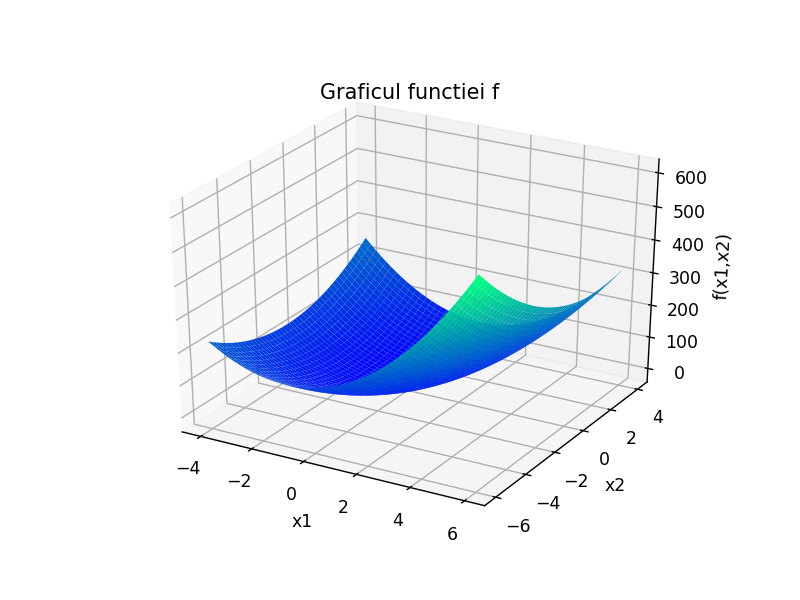

Punctul de minim este [-0.03819444] [0.10416667] si a fost gasit in 34 pasi
[[-1.]
 [ 1.]]


In [6]:
def f(x, y):
    return 18.0 * x*x - 6.0 * x * y + x + 8.5 * y * y - y 
    
# Definire functie f prin matricea A si vectorul b
A = np.array([[18., -3.], 
              [-3., 8.5]])
b = np.array([[-1.],
              [1.]])
x = np.array([[0.], 
             [0.]])

grafic_f(A,b) # graficul functiei f

# Punctul de minim determinat prin rezolvarea sistemului A*x=b + aproximarea la fiecare iteratie
x_num, x_steps = pas_descedent(A, b, x)
plt.scatter(x_num[0], x_num[1], s=50, c='red', marker='*') # plotare punct minim pe graficul functiei
print('Punctul de minim este', x_num[0], x_num[1], 'si a fost gasit in', len(x_steps), 'pasi')
print(A @ x_num) # = b

<IPython.core.display.Javascript object>


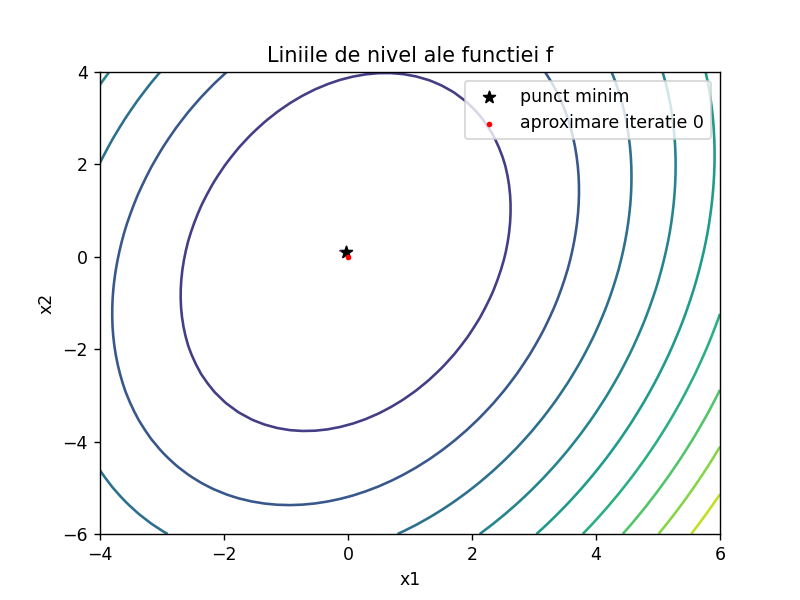

<IPython.core.display.Javascript object>


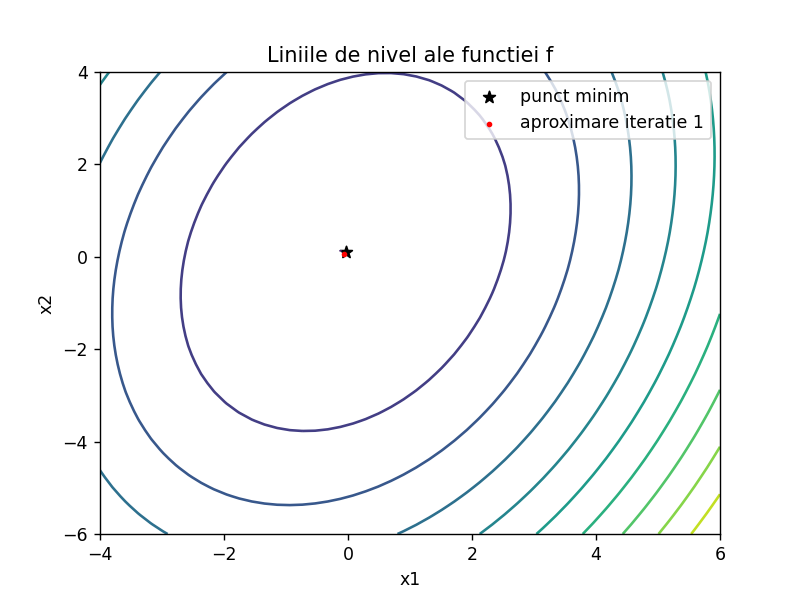

<IPython.core.display.Javascript object>


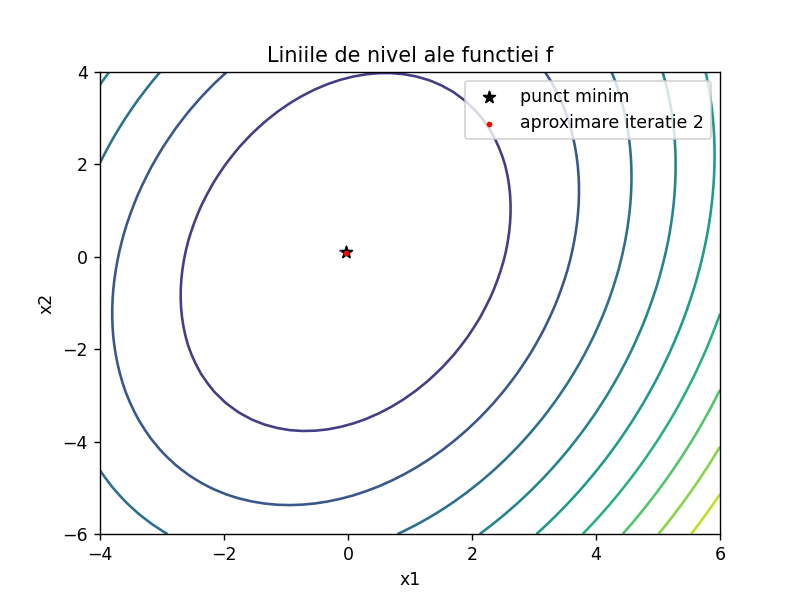

<IPython.core.display.Javascript object>


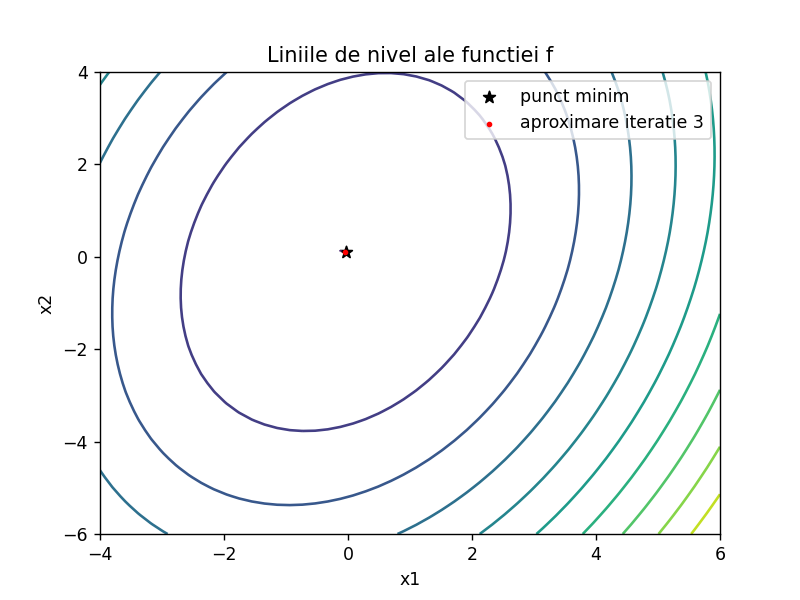

<IPython.core.display.Javascript object>


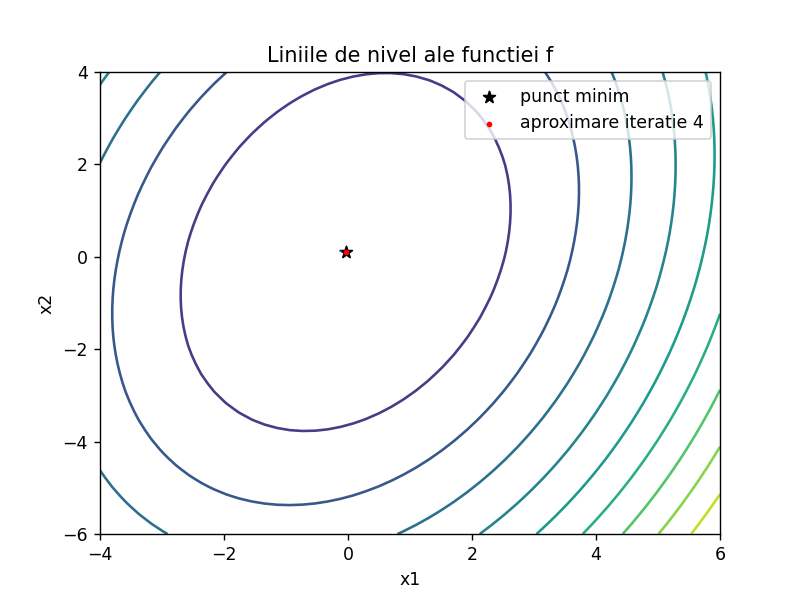

<IPython.core.display.Javascript object>


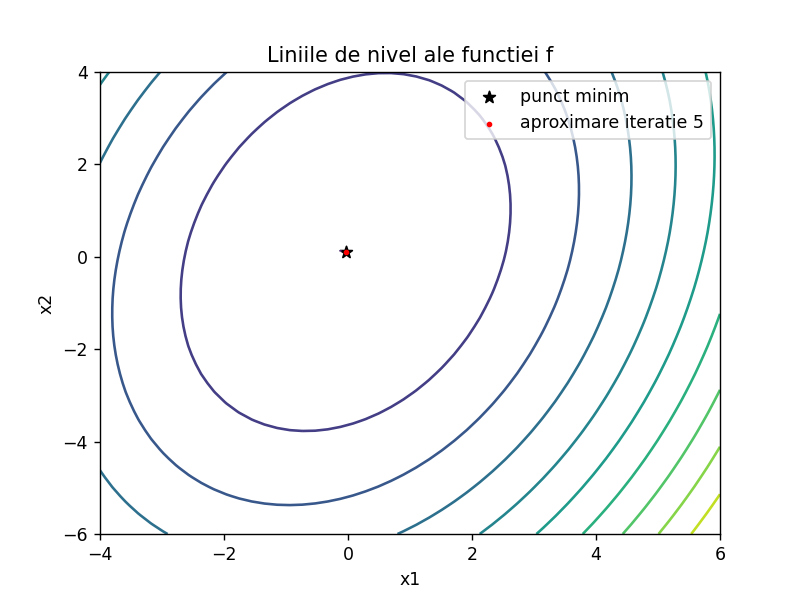

<IPython.core.display.Javascript object>


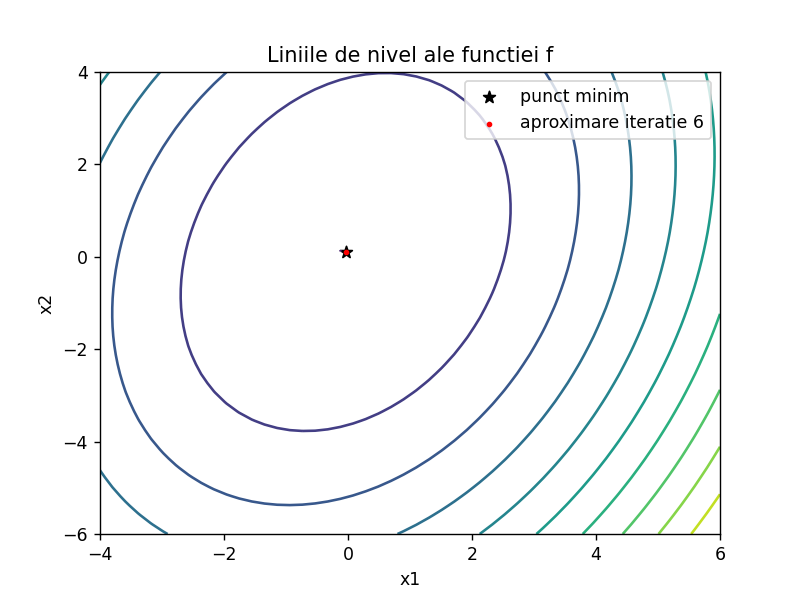

<IPython.core.display.Javascript object>


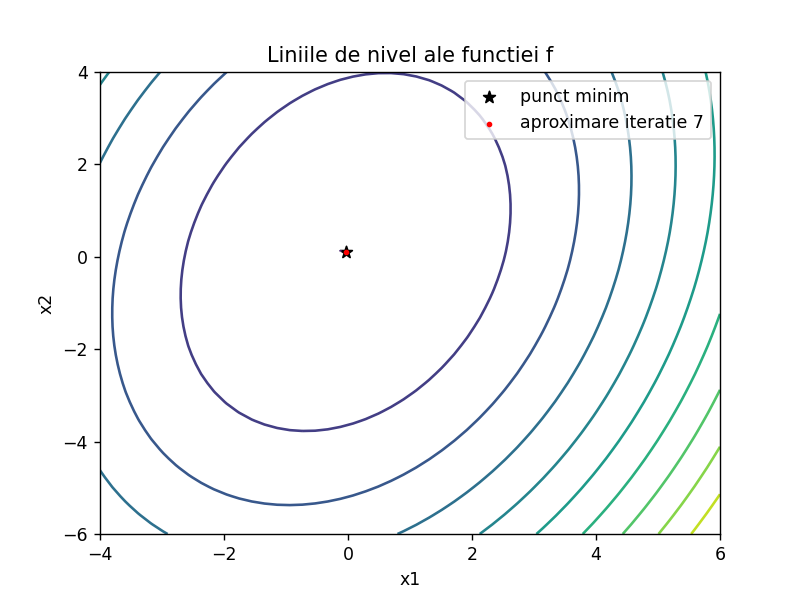

<IPython.core.display.Javascript object>


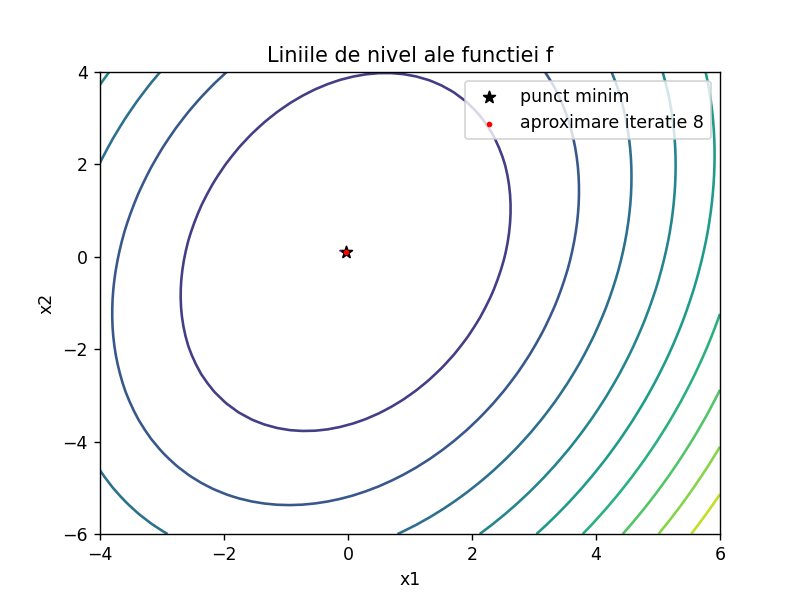

<IPython.core.display.Javascript object>


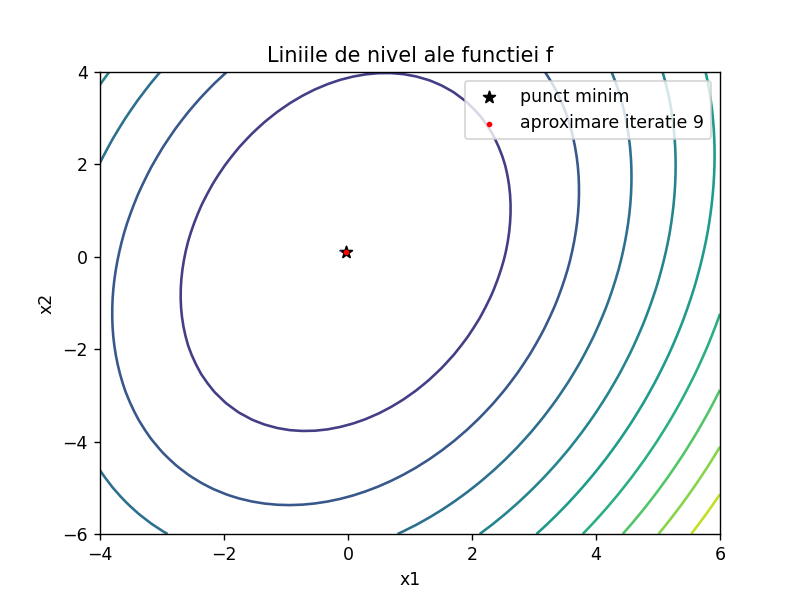

<IPython.core.display.Javascript object>


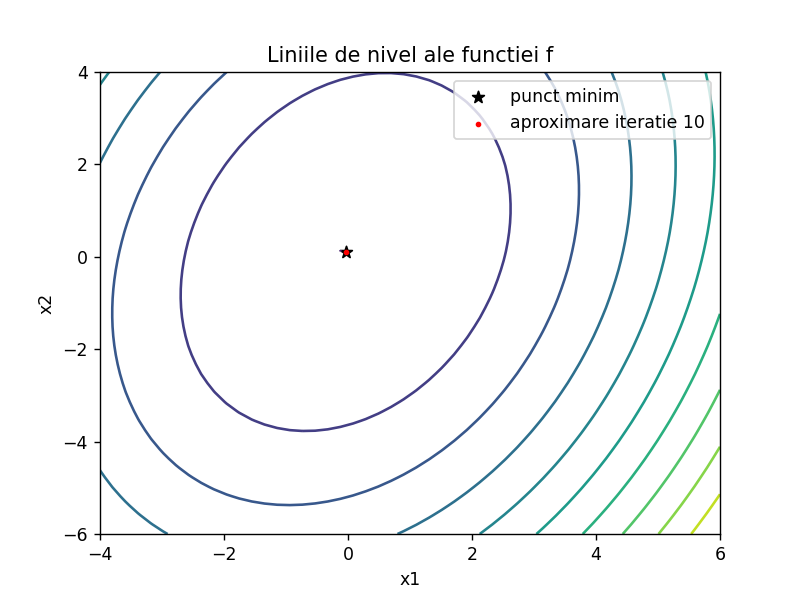

<IPython.core.display.Javascript object>


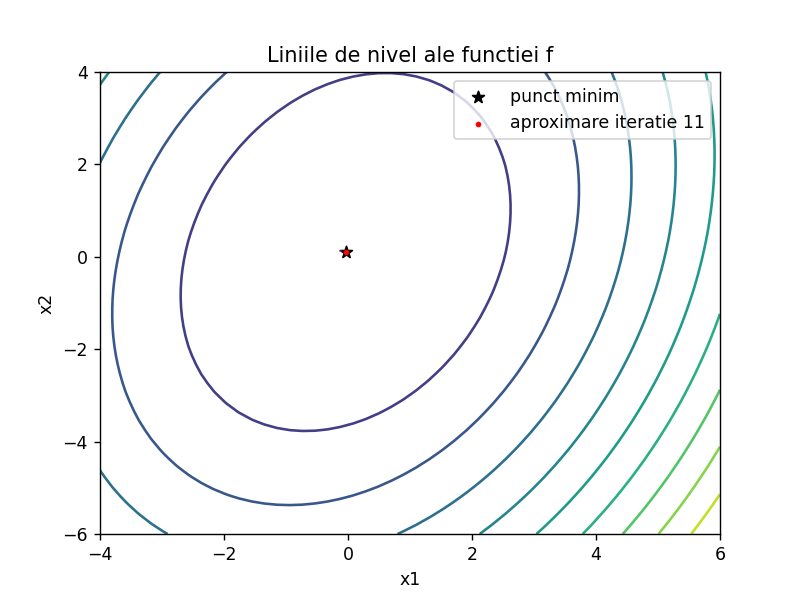

<IPython.core.display.Javascript object>


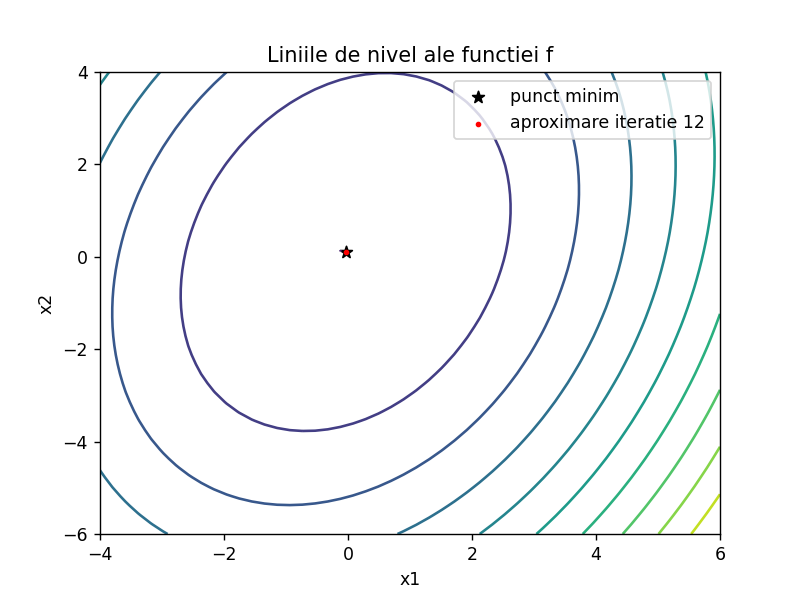

<IPython.core.display.Javascript object>


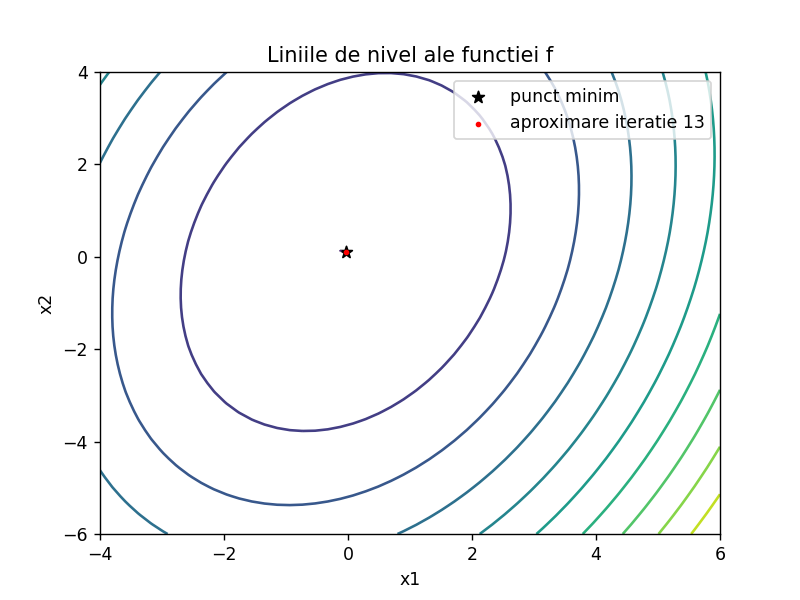

<IPython.core.display.Javascript object>


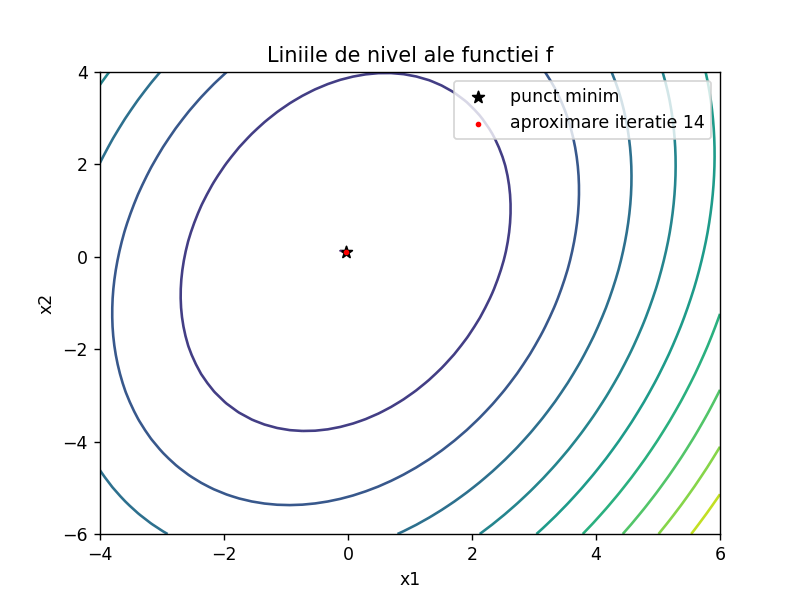

<IPython.core.display.Javascript object>


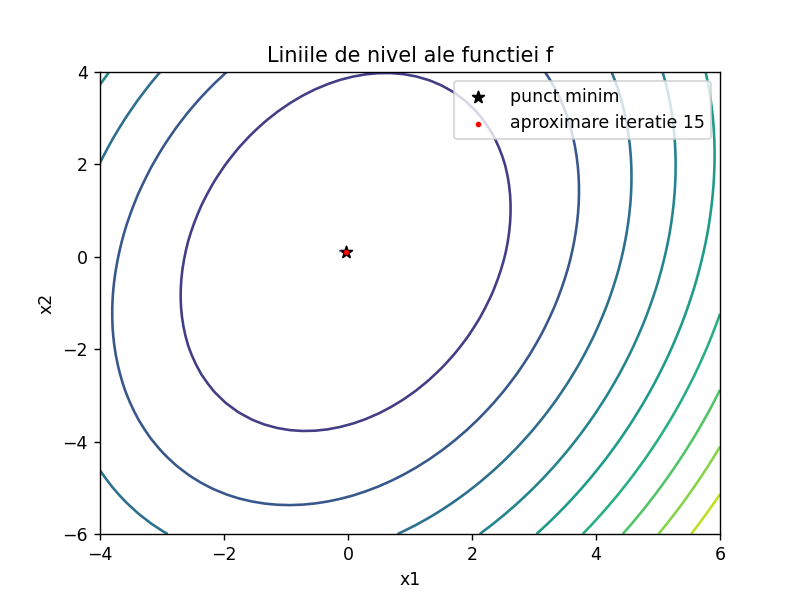

<IPython.core.display.Javascript object>


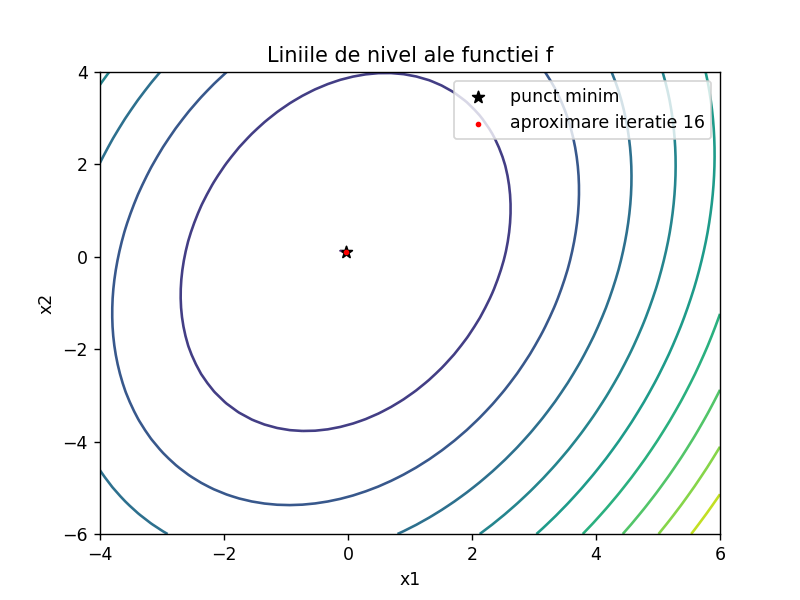

<IPython.core.display.Javascript object>


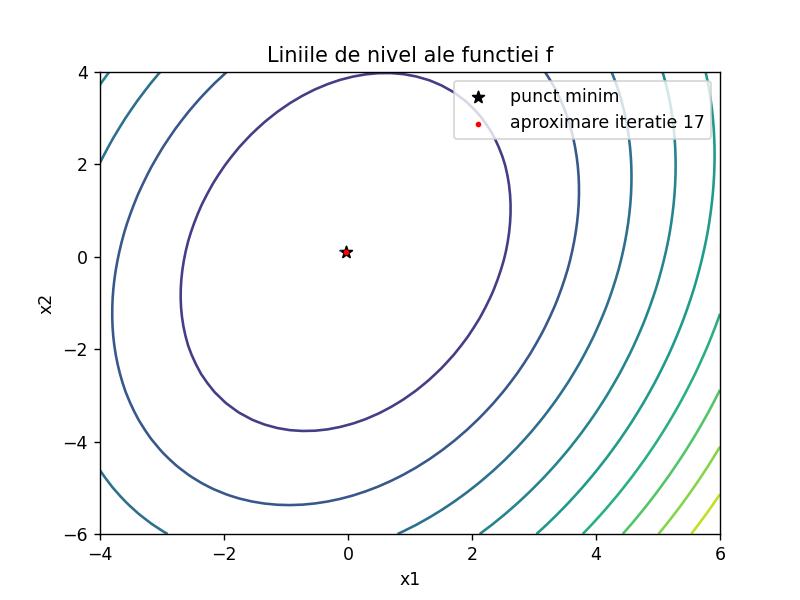

<IPython.core.display.Javascript object>


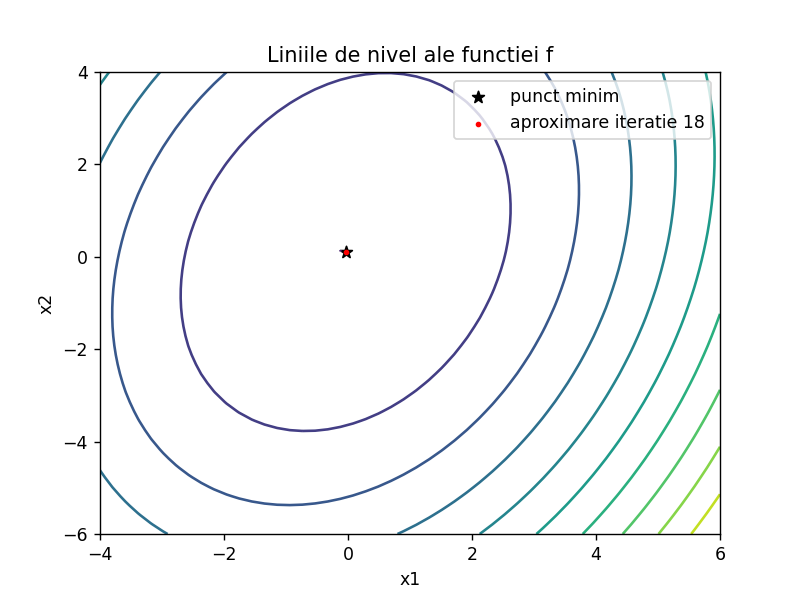

<IPython.core.display.Javascript object>


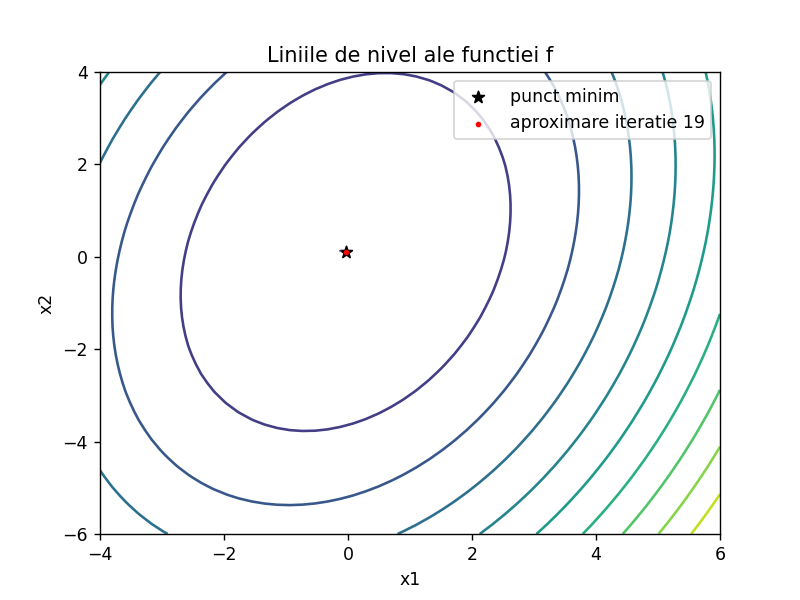

<IPython.core.display.Javascript object>


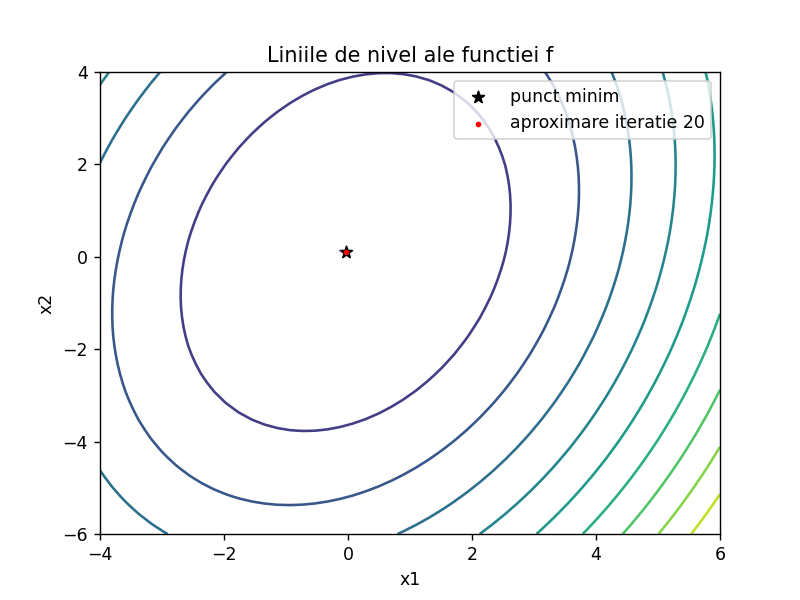

<IPython.core.display.Javascript object>


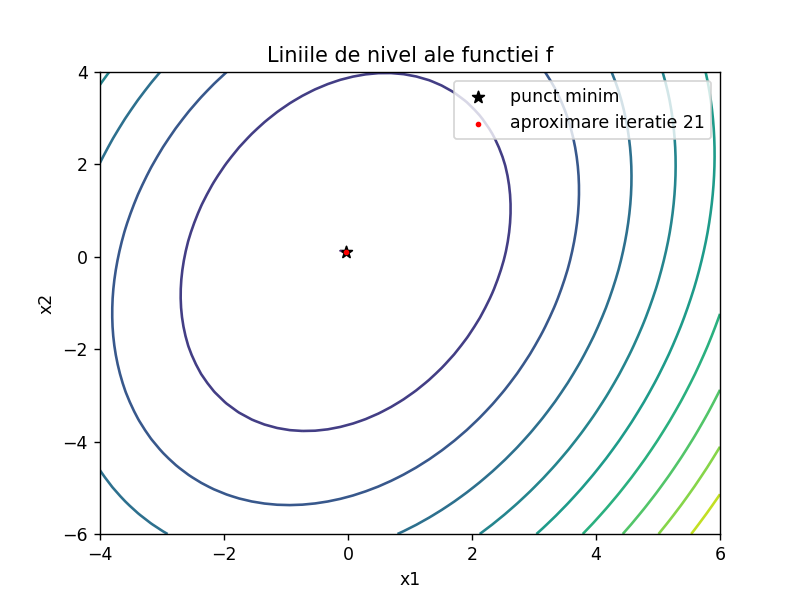

<IPython.core.display.Javascript object>


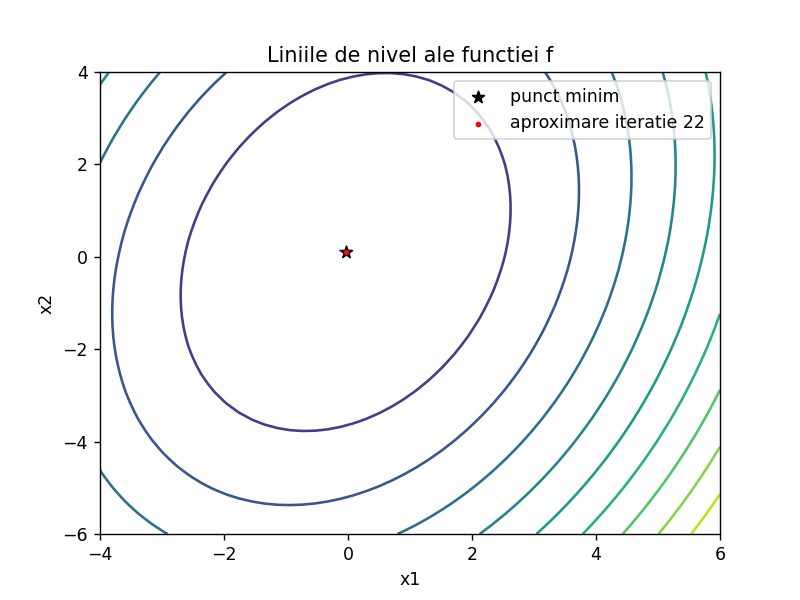

<IPython.core.display.Javascript object>


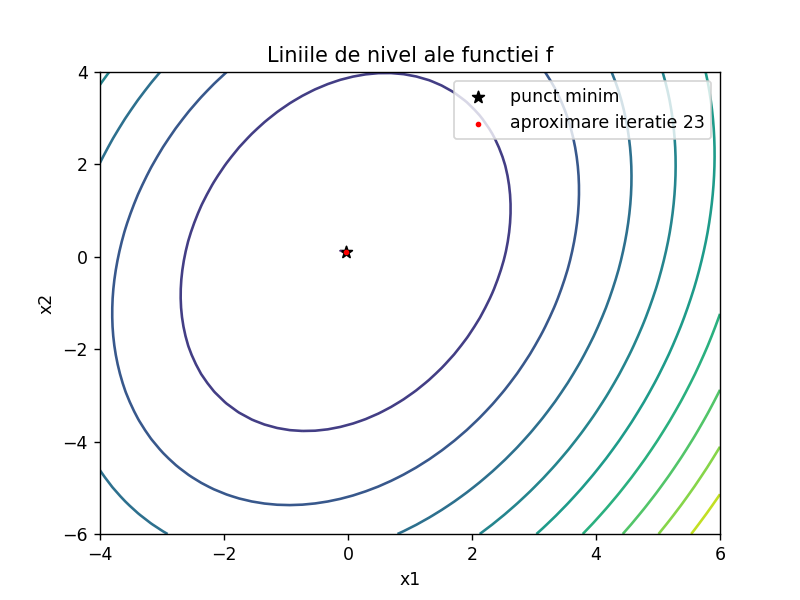

<IPython.core.display.Javascript object>


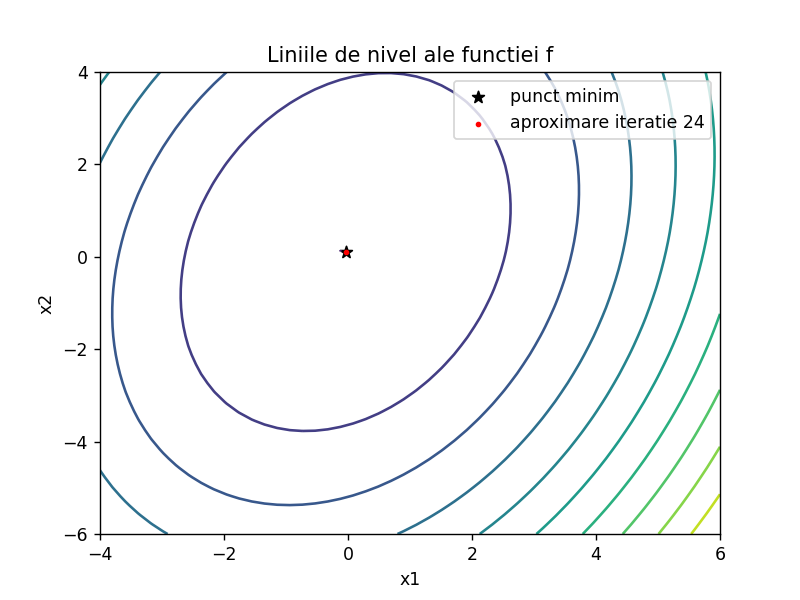

<IPython.core.display.Javascript object>


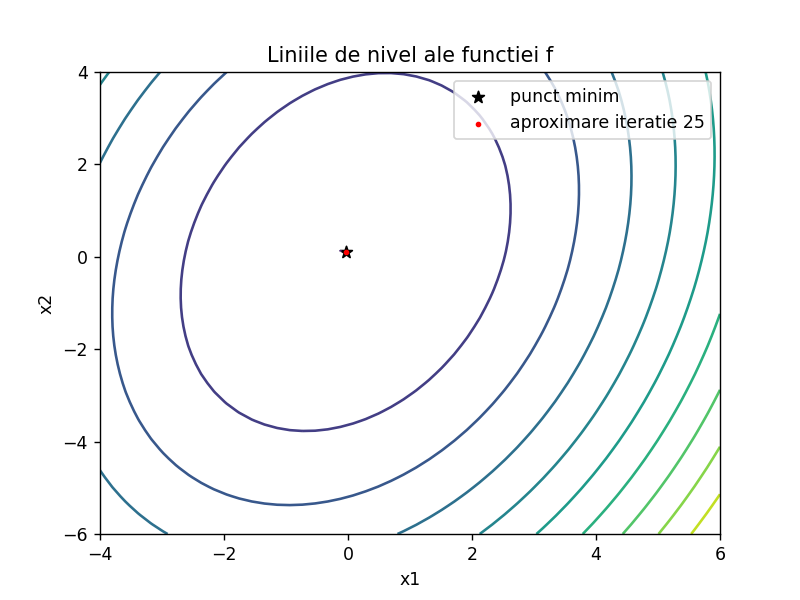

<IPython.core.display.Javascript object>


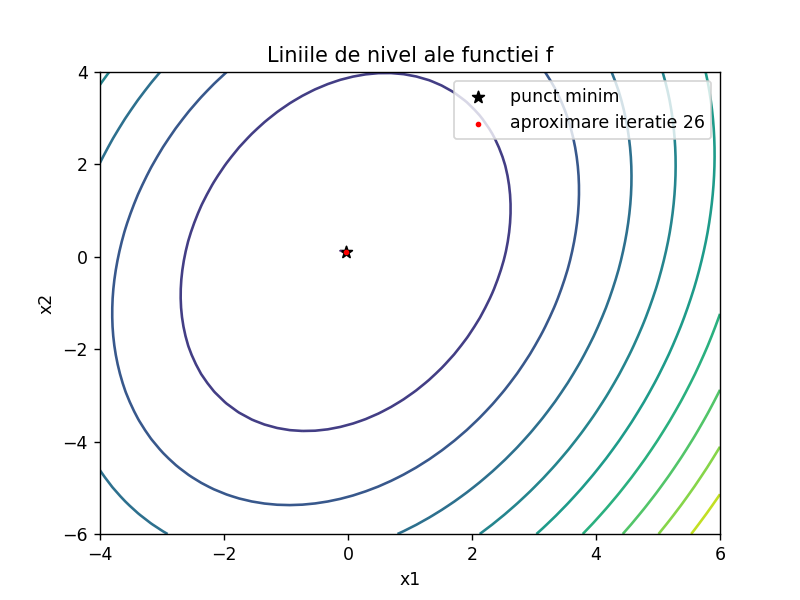

<IPython.core.display.Javascript object>


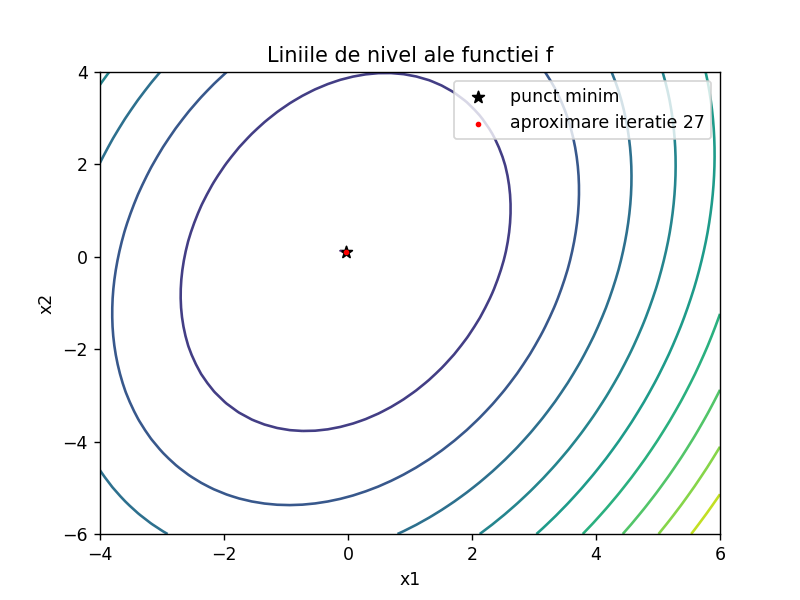

<IPython.core.display.Javascript object>


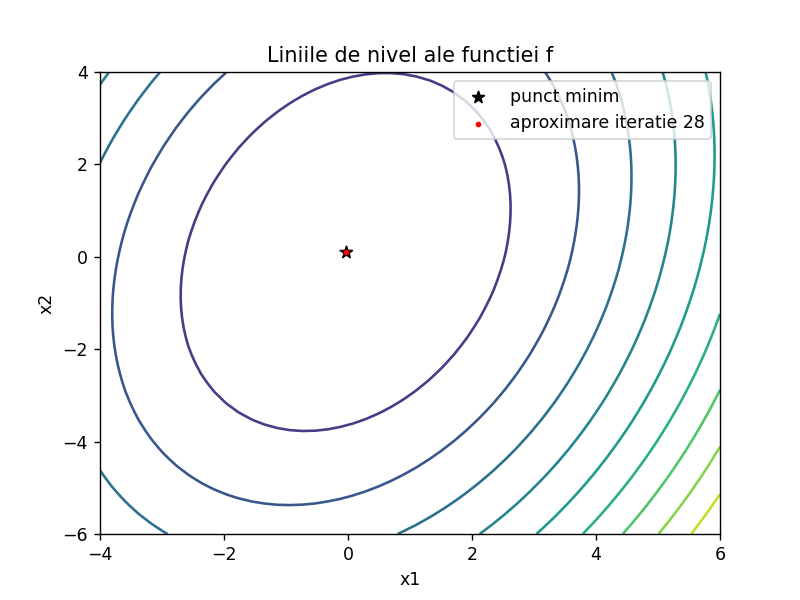

<IPython.core.display.Javascript object>


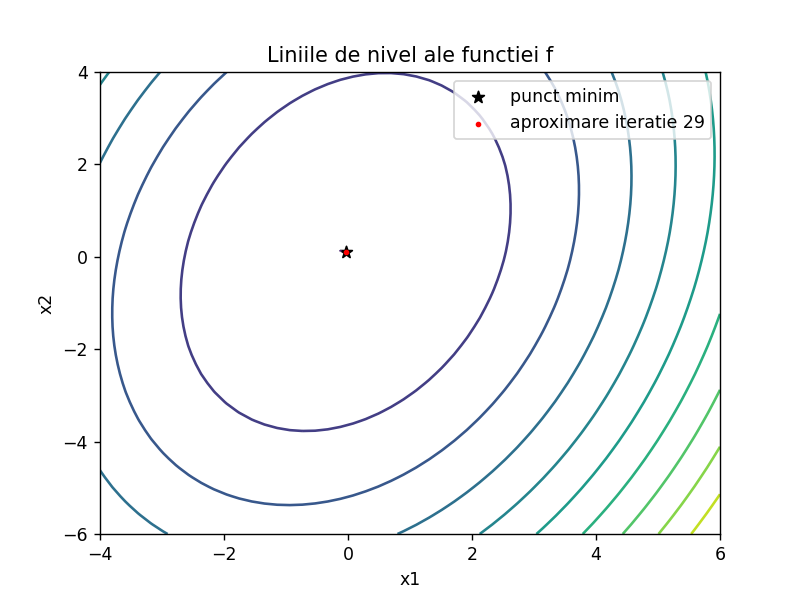

<IPython.core.display.Javascript object>


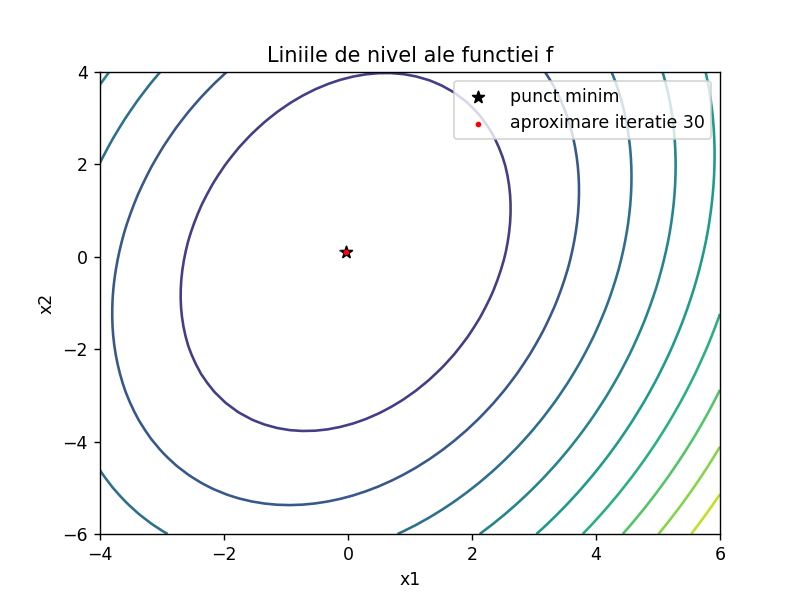

<IPython.core.display.Javascript object>


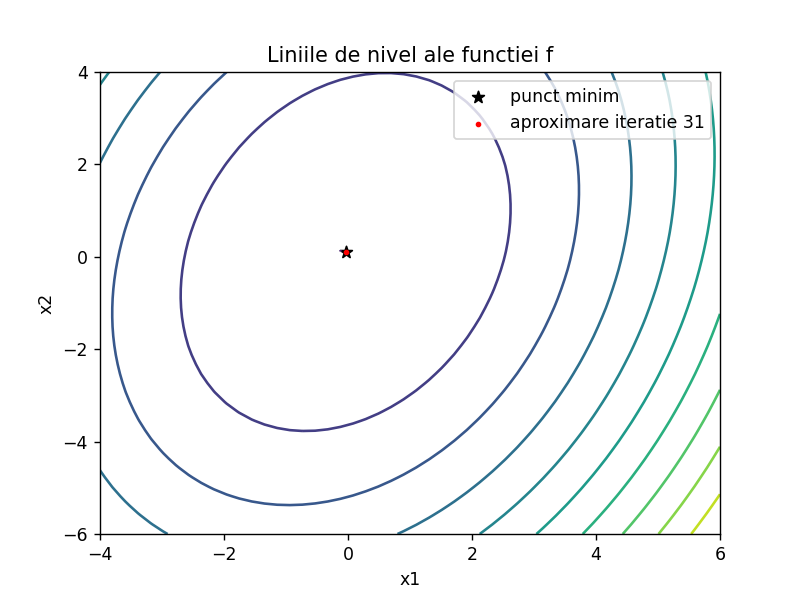

<IPython.core.display.Javascript object>


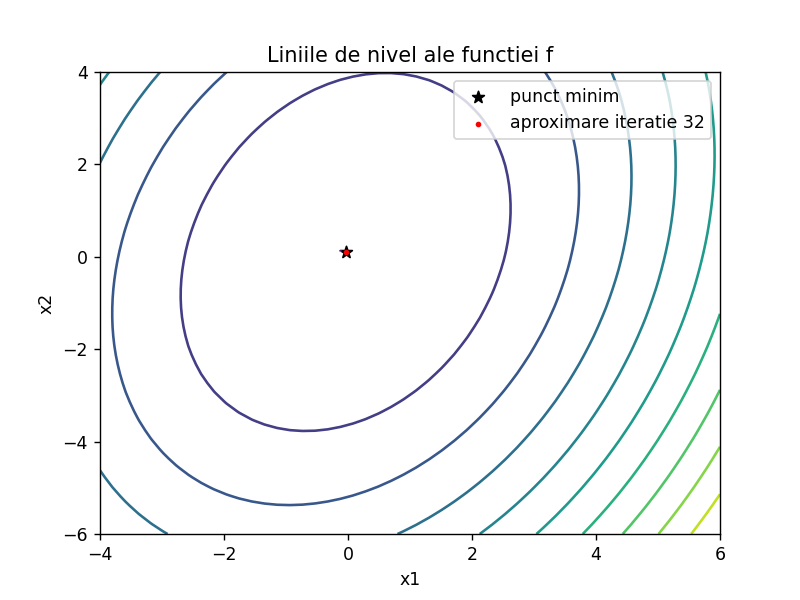

<IPython.core.display.Javascript object>


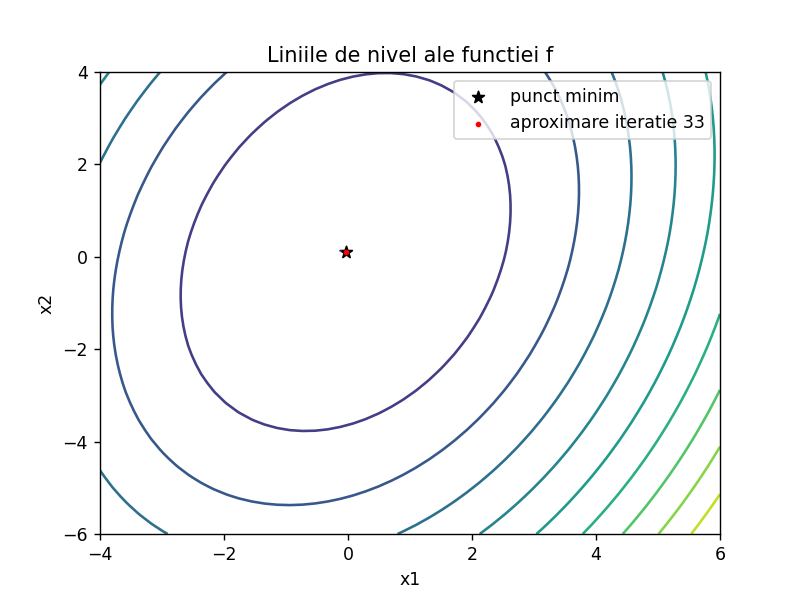

In [7]:
reprezentare_aproximari(x_steps, x_num) # pentru pas descendent, diferentele se vad cu zoom masiv...

In [8]:
def grad_conjug(A, b, x):
    x_steps = [x]
    if (poz_def(A) == False | (A != A.T).any()):
        print('Matricea A trb sa fie simetrica si poz def')
    k = 0
    r = b - A@x
    d = r # directia
    while np.linalg.norm(r) > 1e-14:
        alpha = (r.T @ r) / (d.T @ A @ d) # calcul alpha
        x = x + alpha * d # punct nou
        r_vechi = r
        r = r - alpha * A @ d # reziduu nou
        beta = (r.T @ r) / (r_vechi.T @ r_vechi) # beta(pt noua directie)
        d = r + beta * d # noua directie
        k += 1
        
        if k > 1000:
            break
            
        x_steps.append(x) # adaug aproximarea de la pasul curent
        
    return x, x_steps # solutia x, aproximarile obtinute la fiecare iteratie

<IPython.core.display.Javascript object>


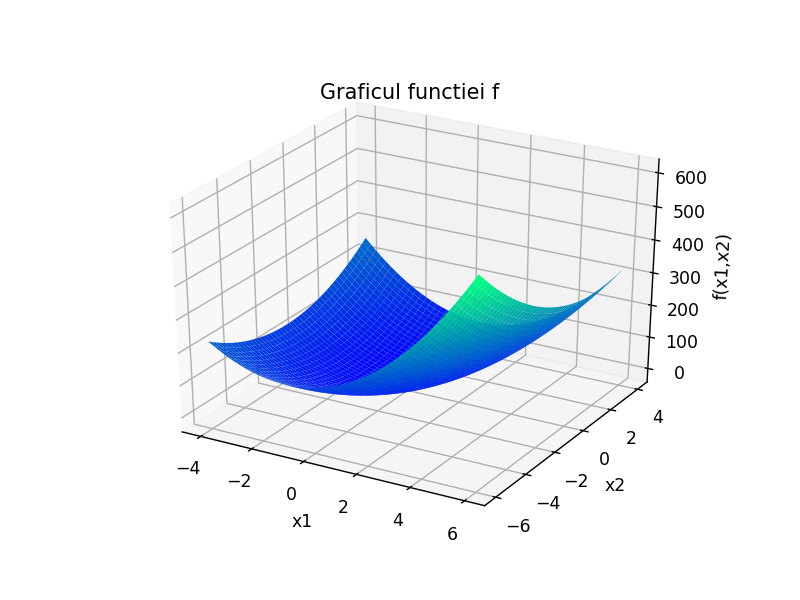

Punctul de minim este [-0.03819444] [0.10416667] si a fost gasit in 4 pasi
A@x_num [[-1.]
 [ 1.]]


In [9]:
grafic_f(A,b) # graficul functiei f

# Punctul de minim determinat prin rezolvarea sistemului A*x=b + aproximarea la fiecare iteratie
x_num, x_steps = grad_conjug(A, b, x)
plt.scatter(x_num[0], x_num[1], s=50, c='red', marker='*') # plotare punct minim pe graficul functiei
print('Punctul de minim este', x_num[0], x_num[1], 'si a fost gasit in', len(x_steps) + 1, 'pasi')
print('A@x_num', A @ x_num) # = b

<IPython.core.display.Javascript object>


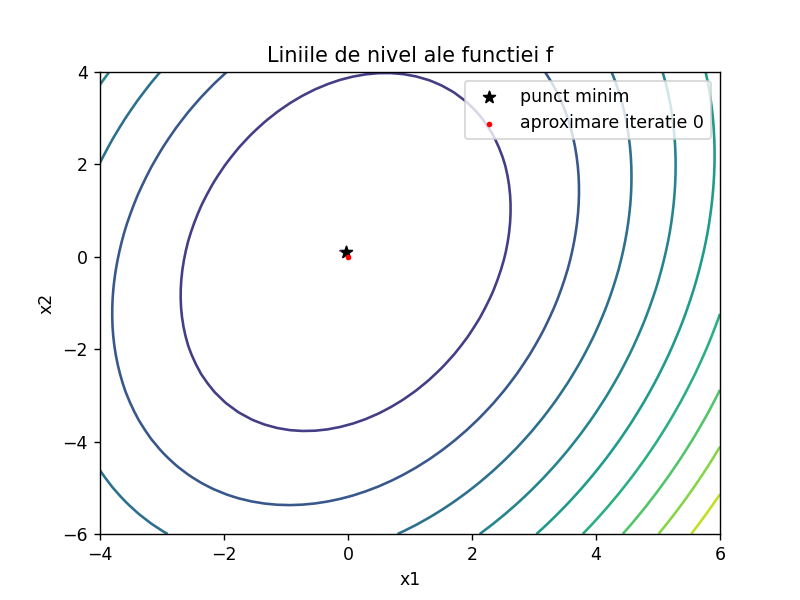

<IPython.core.display.Javascript object>


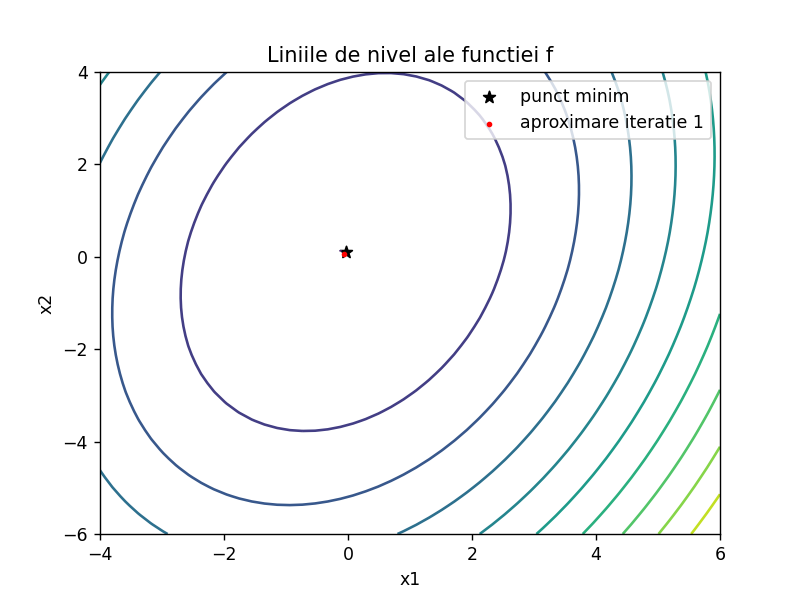

<IPython.core.display.Javascript object>


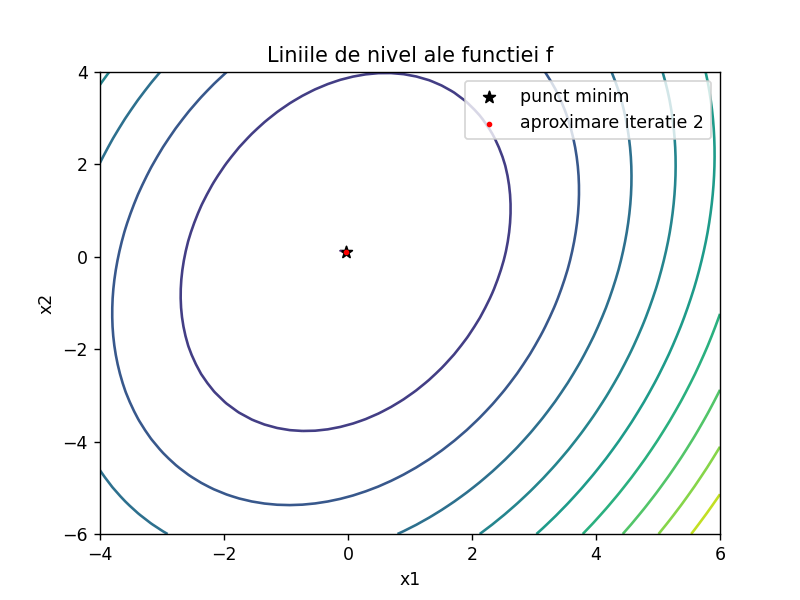

In [10]:
reprezentare_aproximari(x_steps, x_num) # pentru grad_conjug

# EX 2
Sa se aproximeze functia (2) cu polinomul Lagrange PN(x) determinat folosind metoda Newton.
1. Sa se reprezinte grafic functia exacta (2), nodurile de interpolare alese si aproximarea numerica obtinuta.
Se va alege cel mai mic N astfel ıncat eroarea maxima de trunchiere sa satisfaca relatia ||et||∞ ≤ 1e − 5.
2. Sa se reprezinte ıntr-o figura noua eroarea de trunchiere.


In [11]:
def SubsAsc(u, c,  epsilon = 10**(-14)):
    if abs(np.linalg.det(u)) > epsilon: # matr inversabila
        n = np.shape(u)[0] # nr linii
        x = np.array([[float('nan')]] * n) # initalizez solutia cu 'nan' pt n linii
        for k in range(n):
            x[k] = (c[k] - np.dot(u[k][ : k], x[: k])) / u[k][k] # rezolv sistemul (de la prima la ultima linie)
        return x

In [12]:
def eroare_trunchiere(a, b):
    return np.abs(a - b)

def eroare_max_trunchiere(a, b):
    return np.max(eroare_trunchiere(a, b))

In [13]:
def polLagrange_met_newton(X, Y, x):
    """
    X = [X0, .., Xn]
    Y = f(X)
    x punctul in care aproximez functia
    """
    n = X.shape[0] # nr de puncte
    A = np.zeros([n, n]) # matricea sistemului
    
    A[:, 0] = 1 # prima coloana este 1
    for i in range(1, n): # calculez fiecare coloana
        prod = 1
        for j in range(1, i+1):
            prod *= X[i] - X[j-1]
            A[i][j] = prod
            
    # rezolvare sistem cu subs_asc
    C = SubsAsc(A, Y)
    
    #calcul aproximare
    a = C[0]
    prod = 1
    for i in range(1, n):
        prod *= x - X[i-1]
        a += C[i] * prod
    
    return a

In [14]:
def f2(x):
    return 6 * np.sin(-5*x) + 3 * np.cos(4*x) - 3.59*x # x in [-pi,pi]

In [15]:
a, b = -math.pi, math.pi

# plotare f pe [a, b]
x_grafic = np.linspace(a, b, 50) # discretizare a intervalului [a, b]
y_grafic = f2(x_grafic)

err_max = 1e-5  # eroarea maxima dorita == 10^(-5) = 0.00001
curr_err = err_max + 1 # eroarea obtinuta
N = 3 # va creste pana obtinem eroarea dorita
while curr_err > err_max:
    if N > 100:
        raise AssertionError('nu am reusit sa aproximez')
        
    X = np.linspace(a, b, N+1) # discretizare a intervalului [a, b] cu N+1 puncte
    Y = f2(X) # valorile functiei in noduri
    
    # calcul polinom
    pol_lagrange = np.zeros(len(x_grafic))
    for i in range(len(x_grafic)):
        pol_lagrange[i] = polLagrange_met_newton(X, Y, x_grafic[i])
        
    curr_err = eroare_max_trunchiere(pol_lagrange, y_grafic) # eroarea curenta
    print("eroarea maxima de trunchiere pt N = " + str(N) + " : " + str(curr_err))

    N += 1 # cresc nr de noduri

eroarea maxima de trunchiere pt N = 3 : 16.261510496247492
eroarea maxima de trunchiere pt N = 4 : 17.150141715282167
eroarea maxima de trunchiere pt N = 5 : 10.52106715040664
eroarea maxima de trunchiere pt N = 6 : 18.341297302808123
eroarea maxima de trunchiere pt N = 7 : 15.114749476120583
eroarea maxima de trunchiere pt N = 8 : 56.661630772116254
eroarea maxima de trunchiere pt N = 9 : 103.36943993682428
eroarea maxima de trunchiere pt N = 10 : 44.832954231564216
eroarea maxima de trunchiere pt N = 11 : 269.7977355962132
eroarea maxima de trunchiere pt N = 12 : 137.92841771398662
eroarea maxima de trunchiere pt N = 13 : 330.84866537754476
eroarea maxima de trunchiere pt N = 14 : 184.41984447693358
eroarea maxima de trunchiere pt N = 15 : 239.06312085872045
eroarea maxima de trunchiere pt N = 16 : 141.13368492901935
eroarea maxima de trunchiere pt N = 17 : 117.50324344441621
eroarea maxima de trunchiere pt N = 18 : 71.98379547060247
eroarea maxima de trunchiere pt N = 19 : 42.415316

<IPython.core.display.Javascript object>


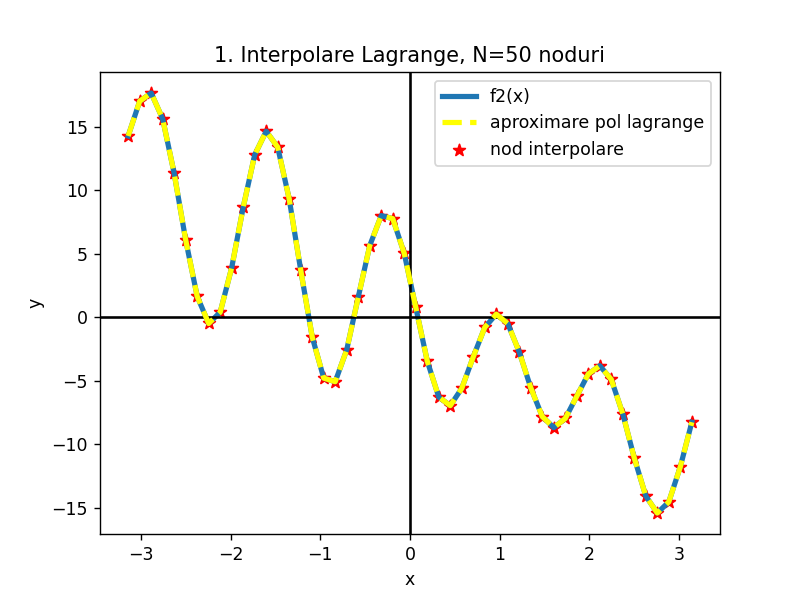

In [16]:
plt.figure()
plt.plot(x_grafic, y_grafic, linestyle = '-', linewidth = 3, label = 'f2(x)') # desenez graficul functiei f
plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX
plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY

plt.plot(x_grafic, pol_lagrange, linestyle = '--', color = 'yellow',linewidth = 3, label = 'aproximare pol lagrange') # grafic polinom
plt.scatter(X, Y, marker='*', c='red', s=50, label = 'nod interpolare') # afisare noduri interpolare
plt.title('1. Interpolare Lagrange, N={} noduri'.format(N))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


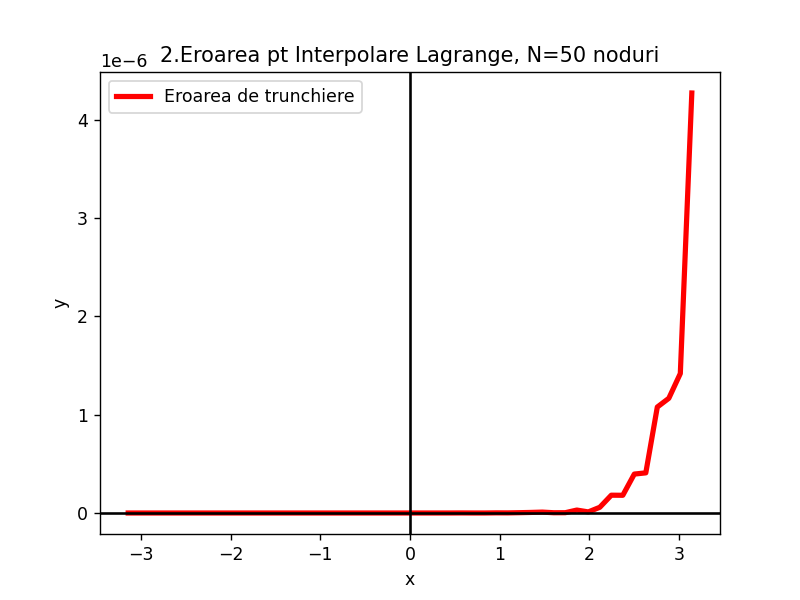

In [17]:
#Grafic eroare
plt.figure()
plt.plot(x_grafic, eroare_trunchiere(pol_lagrange, y_grafic), color = 'red', linewidth = 3, label = 'Eroarea de trunchiere')
plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX
plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY
plt.title('2.Eroarea pt Interpolare Lagrange, N={} noduri'.format(N))
plt.legend()
plt.show()

# EX 3
Sa se aproximeze functia (3) folosind interpolarea cu functii spline cubice.
    1. Sa se reprezinte grafic functia exacta (3), nodurile de interpolare alese si aproximarea numerica obtinuta. Numarul de subintervale in care se va imparti domeniul, N, se va alege cel mai mic posibil astfel incat eroarea maxima de trunchiere sa satisfaca relatia: ||et||∞ ≤ 1e − 5.
    2. Sa se reprezinte intr-o figura noua eroarea de trunchiere.

In [18]:
def f3(x):
    return 5 * np.sin(-6*x) + 5*np.cos(4*x) - 4.8*x
def fderiv(x):
    return -30 * np.cos(-6*x) - 20 * np.sin(4*x) - 4.8

In [19]:
def spline_cubica(X, Y, x):
    """
    X = [X0..Xn]
    Y = f(X)
    x punctul in care aproximez
    """
    # pas 1
    n = X.shape[0] - 1
    A = np.zeros([n+1])
    B = np.zeros([n+1])
    C = np.zeros([n])
    D = np.zeros([n])
    
    # pas 2
    for i in range(n+1):
        A[i] = Y[i]
    
    #construire matrice A 
    matriceA = np.zeros((n+1, n+1))
    matriceA[0][0] = 1
    for i in range(1, n):
        matriceA[i][i-1] = 1
        matriceA[i][i] = 4
        matriceA[i][i+1] = 1
    matriceA[n][n] = 1
    
    #construire matrice W
    W = np.zeros((n+1, 1)) #n+1 linii, 1 coloana
    W[0][0] = fderiv(X[0])
    for i in range(1, n):
        h = X[i+1] - X[i]
        W[i] = 3/h *(Y[i+1] - Y[i-1])
    W[n] = fderiv(X[n])
    
    #calcul coeficienti B
    B = np.linalg.solve(matriceA, W) # rezolv sistemul: matriceA * B = W
    
    #calcul coeficienti C si D
    for i in range(n):
        h = X[i+1] - X[i]
        hh = h * h #h^2
        hhh = h * h * h #h^3
        C[i] = 3/hh * (Y[i+1] - Y[i]) - 1/h * (B[i+1] + 2*B[i])
        D[i] = -2/hhh * (Y[i+1] - Y[i]) + 1/hh * (B[i+1] + B[i])
        
    # pas 3
    for i in range(n):
        if X[i] <= x <= X[i+1]: # se afla in interval
            return A[i] + B[i] * (x - X[i]) + C[i] * (x - X[i])**2 + D[i] * (x - X[i])**3
    return -1

In [20]:
a, b = -math.pi, math.pi

# plotare f pe [a, b]
x_grafic = np.linspace(a, b, 50) # discretizare a intervalului [a, b]
y_grafic = f3(x_grafic)

err_max = 1e-5  # eroarea maxima dorita == 10^(-5) = 0.00001
curr_err = err_max + 1 # eroarea obtinuta
N = 3 # va creste pana obtinem eroarea dorita
while curr_err > err_max:
    if N > 100:
        raise AssertionError('nu am reusit sa aproximez')
        
    X = np.linspace(a, b, N+1) # discretizare a intervalului [a, b] cu N+1 puncte
    Y = f3(X) # valorile functiei in noduri
    
    # calcul interpolare cu functii spline cubice
    spline_cub = np.zeros(len(x_grafic))
    for i in range(len(x_grafic)):
        spline_cub[i] = spline_cubica(X, Y, x_grafic[i])
        
    curr_err = eroare_max_trunchiere(spline_cub, y_grafic) # eroarea curenta
    print("eroarea maxima de trunchiere pt N = " + str(N) + " : " + str(curr_err))

    N += 1 # cresc nr de noduri

eroarea maxima de trunchiere pt N = 3 : 23.625276838237227
eroarea maxima de trunchiere pt N = 4 : 22.622781898141653
eroarea maxima de trunchiere pt N = 5 : 21.084606848878792
eroarea maxima de trunchiere pt N = 6 : 13.748695599294022
eroarea maxima de trunchiere pt N = 7 : 15.501635944043517
eroarea maxima de trunchiere pt N = 8 : 8.688272744222642
eroarea maxima de trunchiere pt N = 9 : 11.011220108044046
eroarea maxima de trunchiere pt N = 10 : 8.432674727010763
eroarea maxima de trunchiere pt N = 11 : 6.0208258267652806
eroarea maxima de trunchiere pt N = 12 : 5.37546124487753
eroarea maxima de trunchiere pt N = 13 : 3.124149936594403
eroarea maxima de trunchiere pt N = 14 : 2.485766678660834
eroarea maxima de trunchiere pt N = 15 : 1.7978617090282052
eroarea maxima de trunchiere pt N = 16 : 1.1995876548671633
eroarea maxima de trunchiere pt N = 17 : 0.9029765872763105
eroarea maxima de trunchiere pt N = 18 : 0.6289798713470098
eroarea maxima de trunchiere pt N = 19 : 0.4819749147

<IPython.core.display.Javascript object>


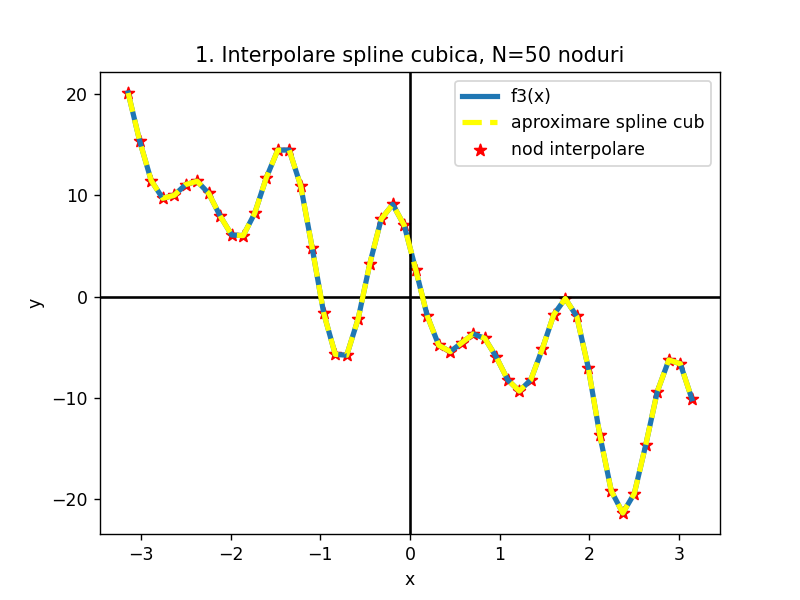

In [21]:
plt.figure()
plt.plot(x_grafic, y_grafic, linestyle = '-', linewidth = 3, label = 'f3(x)') # desenez graficul functiei f
plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX
plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY

plt.plot(x_grafic, spline_cub, linestyle = '--', color = 'yellow',linewidth = 3, label = 'aproximare spline cub') # grafic aprox spline
plt.scatter(X, Y, marker='*', c='red', s=50, label = 'nod interpolare') # afisare noduri interpolare
plt.title('1. Interpolare spline cubica, N={} noduri'.format(N))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


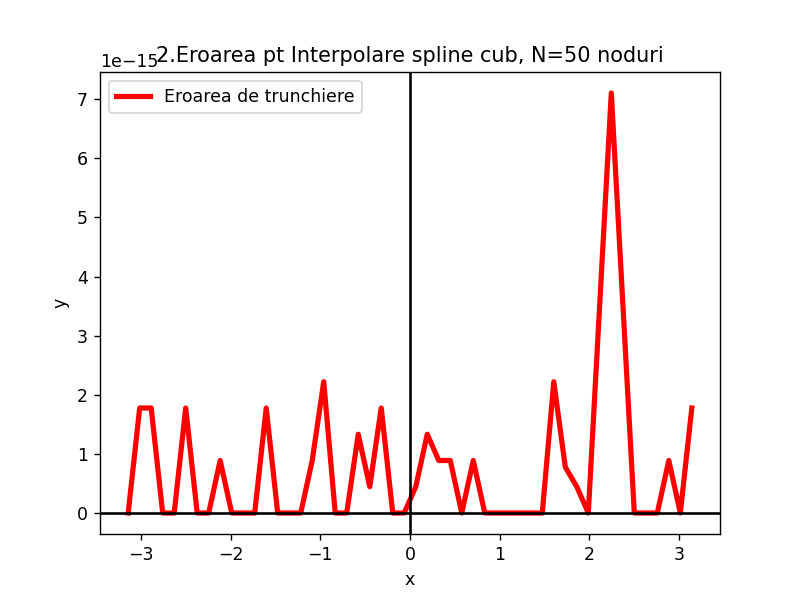

In [22]:
#Grafic eroare
plt.figure()
plt.plot(x_grafic, eroare_trunchiere(spline_cub, y_grafic), color = 'red', linewidth = 3, label = 'Eroarea de trunchiere')
plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX
plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY
plt.title('2.Eroarea pt Interpolare spline cub, N={} noduri'.format(N))
plt.legend()
plt.show()